In [166]:
%load_ext autoreload
%autoreload 2
import numpy as np

#data
features = np.array([
    1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008,
]).T
targets = np.array([
    12, 11, 11, 11.2, 10.8, 10.8, 10.8, 10.6, 10.8, 10.3, 10.3, 10.3, 10.4, 10.5, 10.2, 10, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69
]).T
import pandas as pd
dataset=pd.DataFrame({'features':features,'targets':targets})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='features', ylabel='targets'>

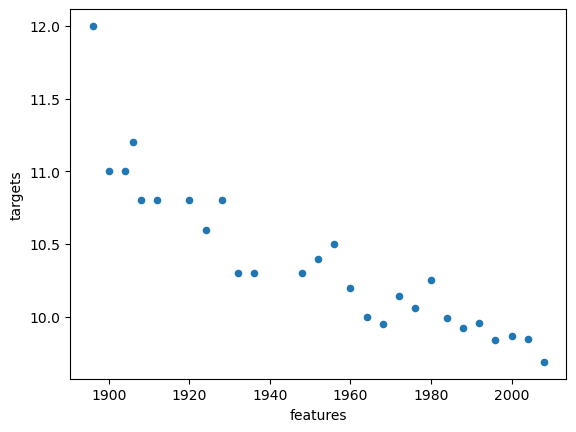

In [167]:
#plot
dataset.plot.scatter(x='features',y='targets')

In [168]:
from ridge import Ridge_Regression
X=dataset['features'].values.reshape(-1,1)
Y=dataset['targets'].values.reshape(-1,1)
## given the low amount of data available we decided to do a leave-one-out K-fold cross validation
## the parameter lambda follows a coarse to fine approach
## the coarse search is done with a step of 0.1 and the fine search with a step of 0.01
lambda_values=np.linspace(0,500,num=(500+1))
for subinterval in 10 ** np.arange(5 + 1): 
    lambda_mses=[]
    print('subinterval: ',subinterval)
    for lambda_value in lambda_values:
        ridge=Ridge_Regression(lambda_value)
        mses=[]
        for i,value in enumerate(X):
            Xi=np.delete(X,i,axis=0)
            Yi=np.delete(Y,i,axis=0)
            ridge.Train(Xi,Yi)
            y_pred=ridge.Predict(X[i].reshape(1,-1))
            mses.append(((Y[i]-y_pred)**2).mean()) #the mean here is not necessary since we are doing leave-one-out but still keeping it for consistency
        lambda_mses.append(np.mean(mses))
        print('lambda: ',lambda_value,' mse: ',np.mean(mses))
    print('best lambda atm: ',lambda_values[np.argmin(lambda_mses)])
    lambda_values=np.linspace(max(lambda_values[np.argmin(lambda_mses)]-1,0)/subinterval,lambda_values[np.argmin(lambda_mses)]+1/subinterval,num=(20+1))
lambda_value=lambda_values[np.argmin(lambda_mses)]

subinterval:  1
lambda:  0.0  mse:  0.0624318496737499
lambda:  1.0  mse:  0.5060328698130923
lambda:  2.0  mse:  0.5096319584463124
lambda:  3.0  mse:  0.5108413918593061
lambda:  4.0  mse:  0.5114479488367139
lambda:  5.0  mse:  0.511812473640038
lambda:  6.0  mse:  0.5120557365828583
lambda:  7.0  mse:  0.5122296165634653
lambda:  8.0  mse:  0.5123600925582278
lambda:  9.0  mse:  0.512461612971004
lambda:  10.0  mse:  0.5125428538893795
lambda:  11.0  mse:  0.5126093399563888
lambda:  12.0  mse:  0.5126647561381925
lambda:  13.0  mse:  0.5127116546284732
lambda:  14.0  mse:  0.5127518590576899
lambda:  15.0  mse:  0.5127867071500847
lambda:  16.0  mse:  0.5128172024536598
lambda:  17.0  mse:  0.5128441125568132
lambda:  18.0  mse:  0.5128680345882778
lambda:  19.0  mse:  0.5128894400461378
lambda:  20.0  mse:  0.5129087061863408
lambda:  21.0  mse:  0.5129261384482895
lambda:  22.0  mse:  0.5129419867677099
lambda:  23.0  mse:  0.5129564576362986
lambda:  24.0  mse:  0.5129697231479

In [169]:
ridge=Ridge_Regression(lambda_value)
ridge.Train(X,Y)
x=np.array([2010,2012,2014,2016,2018,2020]).reshape(-1,1)
y_pred=ridge.Predict(x.reshape(-1,1))
from sklearn.linear_model import Ridge
ridge_sklearn=Ridge(alpha=lambda_value)
ridge_sklearn.fit(X,Y)
y_pred_sklearn=ridge_sklearn.predict(x.reshape(-1,1))
for i in range(len(X)):
    print('year: ',X[i],' time: ',Y[i])
for i in range(len(x)):
    print('year: ',x[i],' time: ',y_pred[i])
    print('scikit: year: ',x[i],' time: ',y_pred_sklearn[i])

year:  [1896]  time:  [12.]
year:  [1900]  time:  [11.]
year:  [1904]  time:  [11.]
year:  [1906]  time:  [11.2]
year:  [1908]  time:  [10.8]
year:  [1912]  time:  [10.8]
year:  [1920]  time:  [10.8]
year:  [1924]  time:  [10.6]
year:  [1928]  time:  [10.8]
year:  [1932]  time:  [10.3]
year:  [1936]  time:  [10.3]
year:  [1948]  time:  [10.3]
year:  [1952]  time:  [10.4]
year:  [1956]  time:  [10.5]
year:  [1960]  time:  [10.2]
year:  [1964]  time:  [10.]
year:  [1968]  time:  [9.95]
year:  [1972]  time:  [10.14]
year:  [1976]  time:  [10.06]
year:  [1980]  time:  [10.25]
year:  [1984]  time:  [9.99]
year:  [1988]  time:  [9.92]
year:  [1992]  time:  [9.96]
year:  [1996]  time:  [9.84]
year:  [2000]  time:  [9.87]
year:  [2004]  time:  [9.85]
year:  [2008]  time:  [9.69]
year:  [2010]  time:  [9.62162053]
scikit: year:  [2010]  time:  [9.62137562]
year:  [2012]  time:  [9.59496735]
scikit: year:  [2012]  time:  [9.59471385]
year:  [2014]  time:  [9.56831418]
scikit: year:  [2014]  time